## Libraries

In [1]:
import os
import pickle

import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

from src.data_preparation.data_preprocessing import DataPreparer, DataSplitter, DataScaler
from src.config import Config

# Data

In [2]:
config = Config()
df = pd.read_csv(config.reporting_data_file_name)
df

,year,country,population,gdp,temperature_change_from_co2,total_ghg,cement_co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,co2,country_order
0,1851,Stany Zjednoczone,24309683.0,9.221132e+10,0.000,922.967,0.000,24.633,0.000,0.000,861.796,0.000,886.430,0
1,1852,Stany Zjednoczone,25040692.0,1.001978e+11,0.001,969.457,0.000,26.791,0.000,0.000,914.353,0.000,941.144,0
2,1853,Stany Zjednoczone,25793143.0,1.109706e+11,0.001,976.582,0.000,30.162,0.000,0.000,925.059,0.000,955.221,0
3,1854,Stany Zjednoczone,26568199.0,1.143574e+11,0.002,1012.674,0.000,33.159,0.000,0.000,962.976,0.000,996.135,0
4,1855,Stany Zjednoczone,27366540.0,1.153065e+11,0.002,1026.163,0.000,38.161,0.000,0.000,974.394,0.000,1012.554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4054,2019,Szwecja,10279122.0,4.670207e+11,0.003,72.984,1.357,8.115,0.536,1.780,5.166,28.523,45.999,44
4055,2020,Szwecja,10353680.0,4.568853e+11,0.003,69.069,1.272,6.649,0.445,1.442,5.528,26.363,42.231,44
4056,2021,Szwecja,10416136.0,4.814924e+11,0.003,72.092,1.259,6.992,0.009,1.901,6.410,27.953,45.044,44
4057,2022,Szwecja,10487333.0,4.942145e+11,0.003,69.975,1.259,6.914,0.012,1.550,6.823,25.997,44.298,44


In [3]:
# Add indexes
df[config.additional_index] = df["country"]
df = df.set_index(['country_order', config.year_index, config.additional_index])
df

country  population  \
country_order year country_index                                      
0             1851 Stany Zjednoczone  Stany Zjednoczone  24309683.0   
              1852 Stany Zjednoczone  Stany Zjednoczone  25040692.0   
              1853 Stany Zjednoczone  Stany Zjednoczone  25793143.0   
              1854 Stany Zjednoczone  Stany Zjednoczone  26568199.0   
              1855 Stany Zjednoczone  Stany Zjednoczone  27366540.0   
...                                                 ...         ...   
44            2019 Szwecja                      Szwecja  10279122.0   
              2020 Szwecja                      Szwecja  10353680.0   
              2021 Szwecja                      Szwecja  10416136.0   
              2022 Szwecja                      Szwecja  10487333.0   
              2023 Szwecja                      Szwecja  10551493.0   

                                               gdp  \
country_order year country_index                     
0             1851 Stany Zjednoczone  9.221132e+10   
              1852 Stany Zjednoczone  1.001978e+11   
              1853 Stany Zjednoczone  1.109706e+11   
              1854 Stany Zjednoczone  1.143574e+11   
              1855 Stany Zjednoczone  1.153065e+11   
...                                            ...   
44            2019 Szwecja            4.670207e+11   
              2020 Szwecja            4.568853e+11   
              2021 Szwecja            4.814924e+11   
              2022 Szwecja            4.942145e+11   
              2023 Szwecja            4.942145e+11   

                                      temperature_change_from_co2  total_ghg  \
country_order year country_index                                               
0             1851 Stany Zjednoczone                        0.000    922.967   
              1852 Stany Zjednoczone                        0.001    969.457   
              1853 Stany Zjednoczone                        0.001    976.582   
              1854 Stany Zjednoczone                        0.002   1012.674   
              1855 Stany Zjednoczone                        0.002   1026.163   
...                                                           ...        ...   
44            2019 Szwecja                                  0.003     72.984   
              2020 Szwecja                                  0.003     69.069   
              2021 Szwecja                                  0.003     72.092   
              2022 Szwecja                                  0.003     69.975   
              2023 Szwecja                                  0.003     70.233   

                                      cement_co2  coal_co2  flaring_co2  \
country_order year country_index                                          
0             1851 Stany Zjednoczone       0.000    24.633        0.000   
              1852 Stany Zjednoczone       0.000    26.791        0.000   
              1853 Stany Zjednoczone       0.000    30.162        0.000   
              1854 Stany Zjednoczone       0.000    33.159        0.000   
              1855 Stany Zjednoczone       0.000    38.161        0.000   
...                                          ...       ...          ...   
44            2019 Szwecja                 1.357     8.115        0.536   
              2020 Szwecja                 1.272     6.649        0.445   
              2021 Szwecja                 1.259     6.992        0.009   
              2022 Szwecja                 1.259     6.914        0.012   
              2023 Szwecja                 1.259     6.790        0.012   

                                      gas_co2  land_use_change_co2  oil_co2  \
country_order year country_index                                              
0             1851 Stany Zjednoczone    0.000              861.796    0.000   
              1852 Stany Zjednoczone    0.000              914.353    0.000   
              1853 Stany Zjednoczone    0.000              925.059    0.000   
         

## Prepare 2 variants, general co2 values and co2 values per capita

In [4]:
data_preparer = DataPreparer()

In [5]:
#general co2 values
df

#co2 values per capita
df_per_capita = data_preparer.divide_by_population(df)

## Prepare data to has feature from = year-2 + year-1 and target = year

In [6]:
#ARIMAX
arimax_df = data_preparer.create_arimax_lightgbm_data(df, config.additional_index, num_lags = 2)
arimax_df_per_capita = data_preparer.create_arimax_lightgbm_data(df_per_capita, config.additional_index, num_lags = 2)

In [7]:
arimax_df

population_lag_1  population_lag_2  \
country_order year country_index                                          
24            1961 Arabia Saudyjska         2435410.0         2348014.0   
              1962 Arabia Saudyjska         2526351.0         2435410.0   
              1963 Arabia Saudyjska         2620915.0         2526351.0   
              1964 Arabia Saudyjska         2719348.0         2620915.0   
              1965 Arabia Saudyjska         2821969.0         2719348.0   
...                                               ...               ...   
16            2019 Włochy                  60277496.0        60390317.0   
              2020 Włochy                  60130136.0        60277496.0   
              2021 Włochy                  59912763.0        60130136.0   
              2022 Włochy                  59729354.0        59912763.0   
              2023 Włochy                  59619106.0        59729354.0   

                                        gdp_lag_1     gdp_lag_2  \
country_order year country_index                                  
24            1961 Arabia Saudyjska  2.797009e+10  2.543139e+10   
              1962 Arabia Saudyjska  3.128838e+10  2.797009e+10   
              1963 Arabia Saudyjska  3.502136e+10  3.128838e+10   
              1964 Arabia Saudyjska  3.807041e+10  3.502136e+10   
              1965 Arabia Saudyjska  4.142495e+10  3.807041e+10   
...                                           ...           ...   
16            2019 Włochy            2.105552e+12  2.086237e+12   
              2020 Włochy            2.115726e+12  2.105552e+12   
              2021 Włochy            1.925752e+12  2.115726e+12   
              2022 Włochy            2.060300e+12  1.925752e+12   
              2023 Włochy            2.136009e+12  2.060300e+12   

                                     temperature_change_from_co2_lag_1  \
country_order year country_index                                         
24            1961 Arabia Saudyjska                              0.000   
              1962 Arabia Saudyjska                              0.000   
              1963 Arabia Saudyjska                              0.000   
              1964 Arabia Saudyjska                              0.000   
              1965 Arabia Saudyjska                              0.000   
...                                                                ...   
16            2019 Włochy                                        0.011   
              2020 Włochy                                        0.011   
              2021 Włochy                                        0.011   
              2022 Włochy                                        0.011   
              2023 Włochy                                        0.011   

                                     temperature_change_from_co2_lag_2  \
country_order year country_index                                         
24            1961 Arabia Saudyjska                              0.000   
              1962 Arabia Saudyjska                              0.000   
              1963 Arabia Saudyjska                              0.000   
              1964 Arabia Saudyjska                              0.000   
              1965 Arabia Saudyjska                              0.000   
...                                                                ...   
16            2019 Włochy                                        0.011   
              2020 Włochy                                        0.011   
              2021 Włochy                                        0.011   
              2022 Włochy                                        0.011   
              2023 Włochy                                        0.011   

                                     total_ghg_lag_1  total_ghg_lag_2  \
country_order year country_index                                        
24            1961 Arabia Saudyjska            7.809            5.760   
              1962 Arabia Saudyjska         

In [8]:
#LightGBM
lightgbm_df = data_preparer.create_arimax_lightgbm_data(df, config.additional_index, num_lags = 2)
lightgbm_df_per_capita = data_preparer.create_arimax_lightgbm_data(df_per_capita, config.additional_index, num_lags = 2)

In [9]:
lightgbm_df

population_lag_1  population_lag_2  \
country_order year country_index                                          
24            1961 Arabia Saudyjska         2435410.0         2348014.0   
              1962 Arabia Saudyjska         2526351.0         2435410.0   
              1963 Arabia Saudyjska         2620915.0         2526351.0   
              1964 Arabia Saudyjska         2719348.0         2620915.0   
              1965 Arabia Saudyjska         2821969.0         2719348.0   
...                                               ...               ...   
16            2019 Włochy                  60277496.0        60390317.0   
              2020 Włochy                  60130136.0        60277496.0   
              2021 Włochy                  59912763.0        60130136.0   
              2022 Włochy                  59729354.0        59912763.0   
              2023 Włochy                  59619106.0        59729354.0   

                                        gdp_lag_1     gdp_lag_2  \
country_order year country_index                                  
24            1961 Arabia Saudyjska  2.797009e+10  2.543139e+10   
              1962 Arabia Saudyjska  3.128838e+10  2.797009e+10   
              1963 Arabia Saudyjska  3.502136e+10  3.128838e+10   
              1964 Arabia Saudyjska  3.807041e+10  3.502136e+10   
              1965 Arabia Saudyjska  4.142495e+10  3.807041e+10   
...                                           ...           ...   
16            2019 Włochy            2.105552e+12  2.086237e+12   
              2020 Włochy            2.115726e+12  2.105552e+12   
              2021 Włochy            1.925752e+12  2.115726e+12   
              2022 Włochy            2.060300e+12  1.925752e+12   
              2023 Włochy            2.136009e+12  2.060300e+12   

                                     temperature_change_from_co2_lag_1  \
country_order year country_index                                         
24            1961 Arabia Saudyjska                              0.000   
              1962 Arabia Saudyjska                              0.000   
              1963 Arabia Saudyjska                              0.000   
              1964 Arabia Saudyjska                              0.000   
              1965 Arabia Saudyjska                              0.000   
...                                                                ...   
16            2019 Włochy                                        0.011   
              2020 Włochy                                        0.011   
              2021 Włochy                                        0.011   
              2022 Włochy                                        0.011   
              2023 Włochy                                        0.011   

                                     temperature_change_from_co2_lag_2  \
country_order year country_index                                         
24            1961 Arabia Saudyjska                              0.000   
              1962 Arabia Saudyjska                              0.000   
              1963 Arabia Saudyjska                              0.000   
              1964 Arabia Saudyjska                              0.000   
              1965 Arabia Saudyjska                              0.000   
...                                                                ...   
16            2019 Włochy                                        0.011   
              2020 Włochy                                        0.011   
              2021 Włochy                                        0.011   
              2022 Włochy                                        0.011   
              2023 Włochy                                        0.011   

                                     total_ghg_lag_1  total_ghg_lag_2  \
country_order year country_index                                        
24            1961 Arabia Saudyjska            7.809            5.760   
              1962 Arabia Saudyjska         

In [10]:
#LSTM
lstm_df = data_preparer.create_lstm_data(df, config.year_index, config.additional_index, num_lags = 2)
lstm_df_per_capita = data_preparer.create_lstm_data(df_per_capita, config.year_index, config.additional_index, num_lags = 2)

In [11]:
lstm_df

country_t-2  population_t-2  \
country_order year country_index                                          
0             1853 Stany Zjednoczone  Stany Zjednoczone      24309683.0   
              1854 Stany Zjednoczone  Stany Zjednoczone      25040692.0   
              1855 Stany Zjednoczone  Stany Zjednoczone      25793143.0   
              1856 Stany Zjednoczone  Stany Zjednoczone      26568199.0   
              1857 Stany Zjednoczone  Stany Zjednoczone      27366540.0   
...                                                 ...             ...   
44            2019 Szwecja                      Szwecja      10057864.0   
              2020 Szwecja                      Szwecja      10175401.0   
              2021 Szwecja                      Szwecja      10279122.0   
              2022 Szwecja                      Szwecja      10353680.0   
              2023 Szwecja                      Szwecja      10416136.0   

                                           gdp_t-2  \
country_order year country_index                     
0             1853 Stany Zjednoczone  9.221132e+10   
              1854 Stany Zjednoczone  1.001978e+11   
              1855 Stany Zjednoczone  1.109706e+11   
              1856 Stany Zjednoczone  1.143574e+11   
              1857 Stany Zjednoczone  1.153065e+11   
...                                            ...   
44            2019 Szwecja            4.491665e+11   
              2020 Szwecja            4.579254e+11   
              2021 Szwecja            4.670207e+11   
              2022 Szwecja            4.568853e+11   
              2023 Szwecja            4.814924e+11   

                                      temperature_change_from_co2_t-2  \
country_order year country_index                                        
0             1853 Stany Zjednoczone                            0.000   
              1854 Stany Zjednoczone                            0.001   
              1855 Stany Zjednoczone                            0.001   
              1856 Stany Zjednoczone                            0.002   
              1857 Stany Zjednoczone                            0.002   
...                                                               ...   
44            2019 Szwecja                                      0.003   
              2020 Szwecja                                      0.003   
              2021 Szwecja                                      0.003   
              2022 Szwecja                                      0.003   
              2023 Szwecja                                      0.003   

                                      total_ghg_t-2  cement_co2_t-2  \
country_order year country_index                                      
0             1853 Stany Zjednoczone        922.967           0.000   
              1854 Stany Zjednoczone        969.457           0.000   
              1855 Stany Zjednoczone        976.582           0.000   
              1856 Stany Zjednoczone       1012.674           0.000   
              1857 Stany Zjednoczone       1026.163           0.000   
...                                             ...             ...   
44            2019 Szwecja                   75.909           1.484   
              2020 Szwecja                   74.144           1.607   
              2021 Szwecja                   72.984           1.357   
              2022 Szwecja                   69.069           1.272   
              2023 Szwecja                   72.092           1.259   

                                      coal_co2_t-2  flaring_co2_t-2  \
country_order year country_index                                      
0             1853 Stany Zjednoczone        24.633            0.000   
              1854 Stany Zjednoczone        26.791            0.000   
              1855 Stany Zjednoczone        30.162            0.000   
              1856 Stany Zjednoczone        33.159            0.000   
              1857 Stany Zjednoczone        38.161            0.0

### Correlation matrix (ARIMAX)

<Axes: >

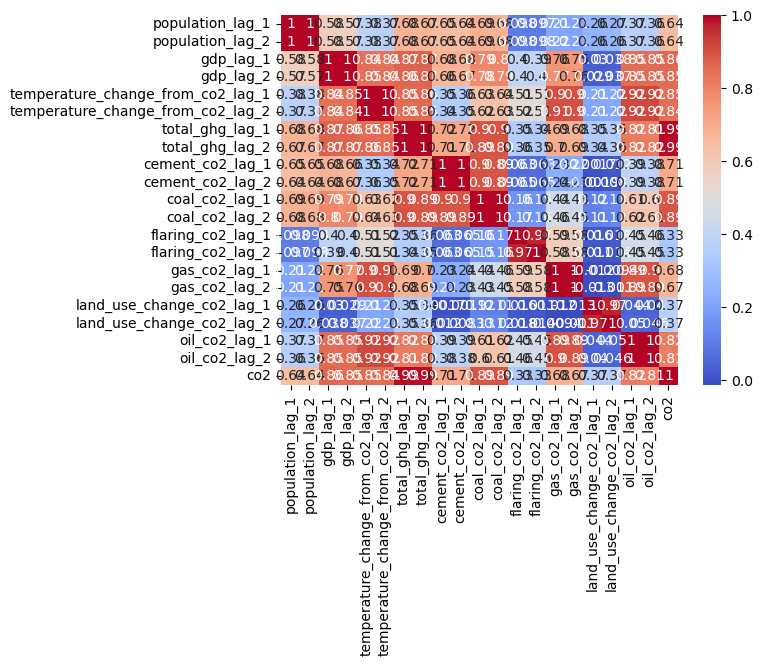

In [12]:
correlation_arimax_matrix = arimax_df.corr()
sns.heatmap(correlation_arimax_matrix, annot=True, cmap="coolwarm")

In [13]:
# Select only the independent variables (exogenous variables) for which you want to check multicollinearity
X = arimax_df.drop(columns=['co2'], inplace = False)  # Remove the target variable

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Feature,VIF
0,const,0.000000
1,population_lag_1,34615.142518
2,population_lag_2,34964.575410
3,gdp_lag_1,2085.664468
4,gdp_lag_2,2026.465483
5,temperature_change_from_co2_lag_1,6671.954716
6,temperature_change_from_co2_lag_2,6472.385835
7,total_ghg_lag_1,4227.787807
8,total_ghg_lag_2,4058.041230
9,cement_co2_lag_1,475.508082


## Split to train and test data

In [14]:
data_splitter = DataSplitter()

In [15]:
#ARIMA
train_arimax_df, test_arimax_df = data_splitter.split_data(arimax_df, config.year_index, config.additional_index)
train_arimax_per_capita_df, test_arimax_per_capita_df = data_splitter.split_data(arimax_df_per_capita, config.year_index, config.additional_index)

In [16]:
#LightGBM
train_lightgbm_df, test_lightgbm_df = data_splitter.split_data(lightgbm_df, config.year_index, config.additional_index)
train_lightgbm_per_capita_df, test_lightgbm_per_capita_df = data_splitter.split_data(lightgbm_df_per_capita, config.year_index, config.additional_index)

In [17]:
#LSTM
train_lstm_df, test_lstm_df = data_splitter.split_data(lstm_df, config.year_index, config.additional_index)
train_lstm_per_capita_df, test_lstm_per_capita_df = data_splitter.split_data(lstm_df_per_capita, config.year_index, config.additional_index)

In [18]:
train_arimax_df['co2']

country_order  year  country_index   
24             1961  Arabia Saudyjska      4.109
               1962  Arabia Saudyjska      6.982
               1963  Arabia Saudyjska      7.993
               1964  Arabia Saudyjska      8.059
               1965  Arabia Saudyjska      5.292
                                          ...   
16             2000  Włochy              434.899
               2001  Włochy              429.323
               2002  Włochy              429.550
               2003  Włochy              452.763
               2004  Włochy              456.137
Name: co2, Length: 3153, dtype: float64

## Save ARIMAX data + preparing variant with exogenous and target variable for arimax using principal component analysis (PCA)

In [19]:
# Separate target (y) before PCA

# general co2
y_train_arimax = train_arimax_df['co2']
y_test_arimax = test_arimax_df['co2']

y_train_arimax.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_arimax, 'co2/y_train.csv'))
y_test_arimax.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_arimax, 'co2/y_test.csv'))

# co2 per capita
y_train_arimax_per_capita = train_arimax_per_capita_df['co2']
y_test_arimax_per_capita = test_arimax_per_capita_df['co2']

y_train_arimax_per_capita.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_arimax, 'co2_per_capita/y_train.csv'))
y_test_arimax_per_capita.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_arimax, 'co2_per_capita/y_test.csv'))

In [20]:
# All features, excluding the target

#general co2
exog_train_arimax = train_arimax_df.drop(columns=['co2'], inplace = False)
exog_test_arimax = test_arimax_df.drop(columns=['co2'], inplace = False)

exog_train_arimax.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_arimax, 'co2/exog_train.csv'))
exog_test_arimax.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_arimax, 'co2/exog_test.csv'))

#co2 per capita
exog_train_arimax_per_capita = train_arimax_per_capita_df.drop(columns=['co2'], inplace = False)
exog_test_arimax_per_capita = test_arimax_per_capita_df.drop(columns=['co2'], inplace = False)

exog_train_arimax_per_capita.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_arimax, 'co2_per_capita/exog_train.csv'))
exog_test_arimax_per_capita.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_arimax, 'co2_per_capita/exog_test.csv'))

In [21]:
# Features using PCA

#general co2
data_preprocessor_arimax = DataScaler()
exog_train_arimax_scaled, exog_test_arimax_scaled = data_preprocessor_arimax.preprocess_data(exog_train_arimax, exog_test_arimax)

with open(os.path.join(config.output_cleaned_arimax, 'co2/data_preprocessor_arimax.pkl'), 'wb') as f: # Save the DataScaler object after it has been fitted
    pickle.dump(data_preprocessor_arimax, f)

#co2 per capita
data_preprocessor_arimax_per_capita = DataScaler()
exog_train_arimax_per_capita_scaled, exog_test_arimax_per_capita_scaled = data_preprocessor_arimax_per_capita.preprocess_data(exog_train_arimax_per_capita, exog_test_arimax_per_capita)

with open(os.path.join(config.output_cleaned_arimax, 'co2_per_capita/data_preprocessor_arimax.pkl'), 'wb') as f: # Save the DataScaler object after it has been fitted
    pickle.dump(data_preprocessor_arimax_per_capita, f)


In [22]:
# Apply PCA to the scaled exogenous variables (training data)
pca = PCA(n_components=0.95)  # Keep components that explain 95% of the variance

#general co2
exog_train_arimax_pca = pca.fit_transform(exog_train_arimax_scaled)
exog_test_arimax_pca = pca.transform(exog_test_arimax_scaled)

num_components = exog_train_arimax_pca.shape[1]
component_names = [f"PC{i+1}" for i in range(num_components)]

exog_train_arimax_pca_df = pd.DataFrame(exog_train_arimax_pca, columns=component_names, index=exog_train_arimax.index)
exog_test_arimax_pca_df = pd.DataFrame(exog_test_arimax_pca, columns=component_names, index=exog_test_arimax.index)

exog_train_arimax_pca_df.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_arimax, 'co2/pca_train.csv'))
exog_test_arimax_pca_df.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_arimax, 'co2/pca_test.csv'))

#co2 per capita
exog_train_arimax_per_capita_pca = pca.fit_transform(exog_train_arimax_per_capita_scaled)
exog_test_arimax_per_capita_pca = pca.transform(exog_test_arimax_per_capita_scaled)

num_components = exog_train_arimax_per_capita_pca.shape[1]
component_names = [f"PC{i+1}" for i in range(num_components)]

exog_train_arimax_per_capita_pca_df = pd.DataFrame(exog_train_arimax_per_capita_pca, columns=component_names, index=exog_train_arimax_per_capita.index)
exog_test_arimax_per_capita_pca_df = pd.DataFrame(exog_test_arimax_per_capita_pca, columns=component_names, index=exog_test_arimax_per_capita.index)

exog_train_arimax_per_capita_pca_df.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_arimax, 'co2_per_capita/pca_train.csv'))
exog_test_arimax_per_capita_pca_df.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_arimax, 'co2_per_capita/pca_test.csv'))


## Save LightGBM and LSTM, prepare scaling and handle categorical variables

In [23]:
#LightGBM
#general co2
data_preprocessor_lightgbm = DataScaler()
train_lightgbm_preprocessed, test_lightgbm_preprocessed = data_preprocessor_lightgbm.preprocess_data(train_lightgbm_df, test_lightgbm_df)

with open(os.path.join(config.output_cleaned_lightgbm, 'co2/data_preprocessor_lightgbm.pkl'), 'wb') as f: # Save the DataScaler object after it has been fitted
    pickle.dump(data_preprocessor_lightgbm, f)

train_lightgbm_preprocessed.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_lightgbm, 'co2/train.csv'))
test_lightgbm_preprocessed.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_lightgbm, 'co2/test.csv'))

#co2 per capita
data_preprocessor_lightgbm_per_capita = DataScaler()
train_lightgbm_per_capita_preprocessed, test_lightgbm_per_capita_preprocessed = data_preprocessor_lightgbm_per_capita.preprocess_data(train_lightgbm_per_capita_df, test_lightgbm_per_capita_df)

with open(os.path.join(config.output_cleaned_lightgbm, 'co2_per_capita/data_preprocessor_lightgbm.pkl'), 'wb') as f: # Save the DataScaler object after it has been fitted
    pickle.dump(data_preprocessor_lightgbm, f)

train_lightgbm_per_capita_preprocessed.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_lightgbm, 'co2_per_capita/train.csv'))
test_lightgbm_per_capita_preprocessed.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_lightgbm, 'co2_per_capita/test.csv'))

In [24]:
#LSTM
#general co2
data_preprocessor_lstm = DataScaler()
train_lstm_preprocessed, test_lstm_preprocessed = data_preprocessor_lstm.preprocess_data(train_lstm_df, test_lstm_df)

with open(os.path.join(config.output_cleaned_lstm, 'co2/data_preprocessor_lstm.pkl'), 'wb') as f: # Save the DataScaler object after it has been fitted
    pickle.dump(data_preprocessor_lstm, f)

train_lstm_preprocessed.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_lstm, 'co2/train.csv'))
test_lstm_preprocessed.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_lstm, 'co2/test.csv'))

#co2 per capita
data_preprocessor_lstm_per_capita = DataScaler()
train_lstm_per_capita_preprocessed, test_lstm_per_capita_preprocessed = data_preprocessor_lstm_per_capita.preprocess_data(train_lstm_per_capita_df, test_lstm_per_capita_df)

with open(os.path.join(config.output_cleaned_lstm, 'co2_per_capita/data_preprocessor_lstm.pkl'), 'wb') as f: # Save the DataScaler object after it has been fitted
    pickle.dump(data_preprocessor_lstm, f)

train_lstm_per_capita_preprocessed.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_lstm, 'co2_per_capita/train.csv'))
test_lstm_per_capita_preprocessed.sort_index(level=['country_order', 'year']).to_csv(os.path.join(config.output_cleaned_lstm, 'co2_per_capita/test.csv'))